# Using Tensor Flow Steps for Machine Learning and Data Science.
    https://www.youtube.com/watch?v=79R_4GhQIbs

### Step 1: Import tensorflow and Keras

In [2]:
import tensorflow as tf
from tensorflow import keras

#import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.0.0


### Step 2: Import the fasshion mmnist dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Step 3: Examine the Image Data

In [4]:
train_images.shape
np.unique(train_labels)
train_images[2] #image that is find in the 3 array position 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
          0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212, 205, 185,
        179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  85,  76, 199, 225,
        248, 255, 238, 226, 157,  68,  80,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91,  69,  91, 201,
        218, 225, 209, 158,  61,  93,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79,  89,  61,  59,
         87, 108,  75,  56,  76,  97,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,  89,  80,  80,
         67,  63,  73,  83,  80,  96,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

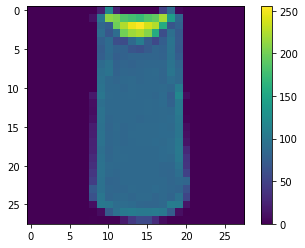

In [5]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.show()

### Step 4 : Preprocess the dataset

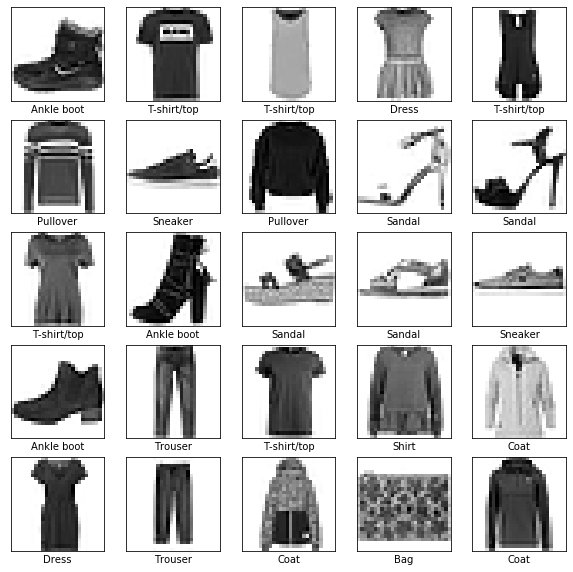

In [6]:
train_images = train_images/255
test_images = test_images/255

#This class define the labels of images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(train_images[i], cmap=plt.cm.binary) #color of image will be black and white
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

### Step 5 : Set up the Neural Network Layers
Description of Layers in the network :   
    Imput layer - Flatten the two dimensional arrar(28x28) into 1D array(28x28 = 784)  
    Hidden layer - Dense fully connected layer of 28 nodes (relu)  
    Output layer - Dense fully connected layer of 10 nodes (softmax)  

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])


### Step 6 : Compile the Model

     Compile the Model means to understand basicly three principal things:
     1 - Optimizer - Mesures how the model is updated (in tensorflow 'adam')
     2 - Loss function - Measures how accurate the output is ('sparse_categorical_crossentropy')
     3 - Metrics - Monitors the training to deternime when to stop (['accuracy'])

In [8]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


### Step 7 : Training the Model

    In this point we are going to train the models in 10 epochs (that is complete presentation of the training dataset), This means that we would feed the 60000 images and labes into the network 10 different time, for each epochs we could see both the loos and accuracy of the model

In [9]:
model.fit(train_images, train_labels, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.4995 - accuracy: 0.8253
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3771 - accuracy: 0.8642
Epoch 3/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3411 - accuracy: 0.8770
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3184 - accuracy: 0.8824
Epoch 5/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3005 - accuracy: 0.8899
Epoch 6/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2840 - accuracy: 0.8960
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2710 - accuracy: 0.8989
Epoch 8/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2613 - accuracy: 0.9036
Epoch 9/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2515 - accuracy: 0.9063
Epoch 10/10
6

In [44]:
print(test_images.shape)

(10000, 28, 28)


### Step 8 : Make Predictions Using the Model

In [10]:
# By the results in the last step, the accuracy have a good porcentage but we will pass test_loss and
# test_accuracy in the model.evaluate for showing the model accuracy

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [11]:
predictions = model.predict(test_images)
print(test_images.shape) # how many images we have 10000 prediction images
print(predictions.shape) # we have 10000 prediction for each of theme we have 10 diferents items


(10000, 28, 28)
(10000, 10)


In [13]:
# A prediction is a array of 10 numbers (each elements represents the confidence that the images 
# corresponds to the each of the 10 diferents classes) 
predictions[0]

#the result shows that to % is found un the possition class_names[ ] wich means is ankle boots)
# Looking in this array:
# class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

array([6.9496554e-07, 4.8199289e-10, 1.8038924e-09, 1.3930780e-10,
       3.9027054e-08, 2.2865643e-03, 1.3148188e-07, 6.4125345e-03,
       6.6173510e-07, 9.9129933e-01], dtype=float32)

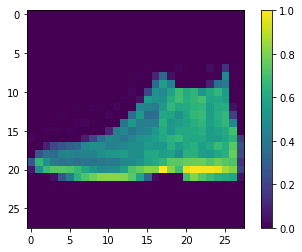

In [14]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.show()

### Step 9: Evaluate the Model Results1
    #The intension is to visualize the performance the model

In [15]:
# Plot an image
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'green'
    else :
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]), color = color)
    
#Function to create bar plot of the predictions
def plot_value_array(i, predictions_array, true_label):
    predictios_array, true_label = predictions_array, true_label[i]
    
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictios_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


<function matplotlib.pyplot.show(*args, **kw)>

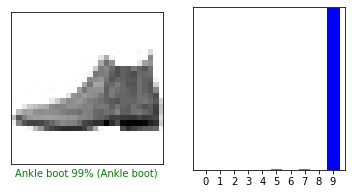

In [16]:
j=0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(j, predictions[j], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(j, predictions[j], test_labels)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

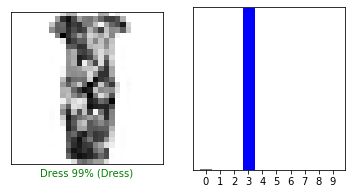

In [17]:
j=100
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(j, predictions[j], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(j, predictions[j], test_labels)
plt.show

### Step 10 : Evaluate the Model Results2

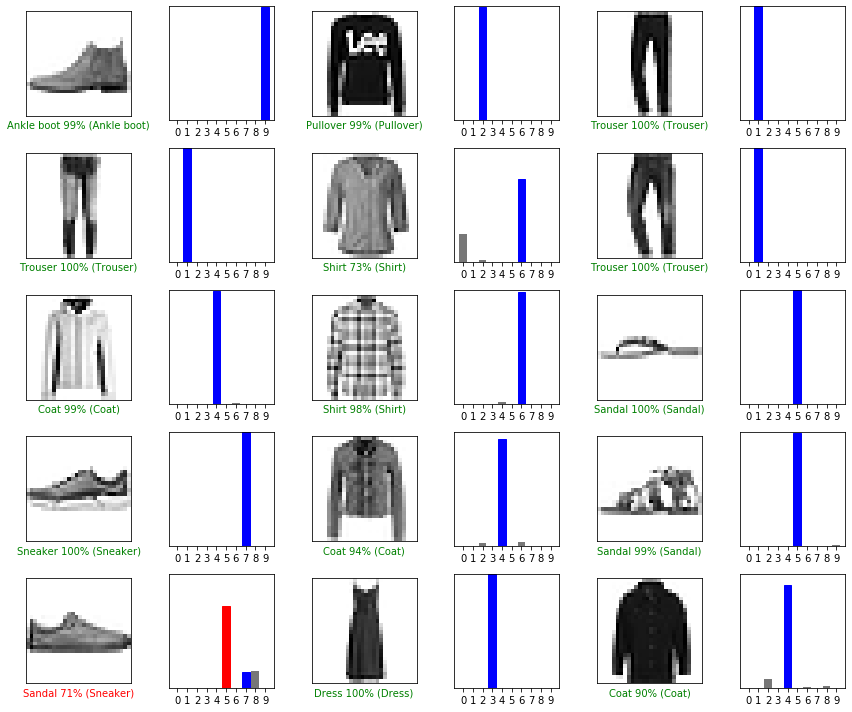

In [18]:
rows = 5
cols = 3

num_images = rows * cols
plt.figure(figsize = (2*2*cols, 2*rows))

for i in range(num_images):
    plt.subplot(rows, 2*cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(rows, 2*cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
    
plt.tight_layout()
plt.show()

### Step : 11 - Make Prediction on a Single Image

(28, 28)
(1, 28, 28)


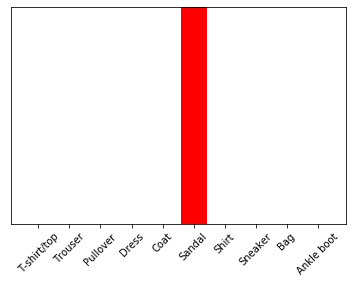

In [19]:
img = test_images[8]
print(img.shape)

img = (np.expand_dims(img, 0))
print(img.shape)

my_prediction = model.predict(img)
my_prediction

plot_value_array(1, my_prediction[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)


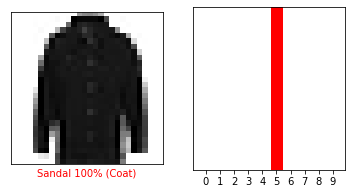

In [20]:
k = 8
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[k], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[k], test_labels)
plt.show()